<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Patent-Numbers" data-toc-modified-id="Patent-Numbers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Patent Numbers</a></span><ul class="toc-item"><li><span><a href="#Processing" data-toc-modified-id="Processing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Processing</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Applicants" data-toc-modified-id="Applicants-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Applicants</a></span></li><li><span><a href="#Primary-Examiners" data-toc-modified-id="Primary-Examiners-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Primary Examiners</a></span></li><li><span><a href="#Attorneys" data-toc-modified-id="Attorneys-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Attorneys</a></span></li><li><span><a href="#Publication-Dates" data-toc-modified-id="Publication-Dates-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Publication Dates</a></span></li><li><span><a href="#Abstracts" data-toc-modified-id="Abstracts-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Abstracts</a></span></li><li><span><a href="#1-Grams" data-toc-modified-id="1-Grams-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>1-Grams</a></span><ul class="toc-item"><li><span><a href="#Top-1-Grams-Lists" data-toc-modified-id="Top-1-Grams-Lists-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Top 1-Grams Lists</a></span></li><li><span><a href="#1-Gram-Year-Quarter-Corpuses" data-toc-modified-id="1-Gram-Year-Quarter-Corpuses-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>1-Gram Year-Quarter Corpuses</a></span></li><li><span><a href="#Common-1-Grams--Over-Time" data-toc-modified-id="Common-1-Grams--Over-Time-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Common 1-Grams  Over Time</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#2-Grams" data-toc-modified-id="2-Grams-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>2-Grams</a></span><ul class="toc-item"><li><span><a href="#Top-2-gram-Lists" data-toc-modified-id="Top-2-gram-Lists-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Top 2-gram Lists</a></span></li><li><span><a href="#2-Gram-Year-Quarter-Corpuses" data-toc-modified-id="2-Gram-Year-Quarter-Corpuses-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>2-Gram Year-Quarter Corpuses</a></span></li><li><span><a href="#Common-2-Grams-Over-Time" data-toc-modified-id="Common-2-Grams-Over-Time-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Common 2-Grams Over Time</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#3-grams" data-toc-modified-id="3-grams-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>3-grams</a></span><ul class="toc-item"><li><span><a href="#Top-3-Gram-Lists" data-toc-modified-id="Top-3-Gram-Lists-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Top 3-Gram Lists</a></span></li><li><span><a href="#3-Gram-Year-Quarter-Corpuses" data-toc-modified-id="3-Gram-Year-Quarter-Corpuses-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>3-Gram Year-Quarter Corpuses</a></span></li><li><span><a href="#Common-3-Grams-Over-Time" data-toc-modified-id="Common-3-Grams-Over-Time-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Common 3-Grams Over Time</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></div>

In [272]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from scipy import stats
import datetime as dt
import re
import statistics
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from textblob import TextBlob
import numpy as np

In [177]:
plt.style.use('seaborn-poster')
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [224]:

in_paths = ['microbiome_patents', 'probiotic_patents']
if (len(in_paths) == 1) or (isinstance(in_paths, str)):
    with open(f'{in_path}.json', 'r') as f:
        patent_data = json.load(f)
elif len(in_paths) > 1:
    patent_data = {}
    for in_path in in_paths:
        with open(f'{in_path}.json', 'r') as f:
            tmp_data = json.load(f)
        patent_data.update(tmp_data)

patent_ids = [i for i in list(patent_data.keys())]
terms = [i.split('_')[0] for i in patent_ids]
print('Terms found in the data include:', set(terms), '\n')
for term in set(terms):
    term_ids = [i.split('_')[1] for i in patent_ids if i.split('_')[0] == term]
    print(f'Minimum {term} patent result number : {min(term_ids)}\nMaximum {term} patent result number : {max(term_ids)}')


Terms found in the data include: {'microbiome', 'probiotic'} 

Minimum microbiome patent result number : 000001
Maximum microbiome patent result number : 001084
Minimum probiotic patent result number : 000001
Maximum probiotic patent result number : 001100


In [225]:
### Reminder of keys in dictionary
list(list(patent_data.values())[0].keys())

['page_url',
 'primary_examiner',
 'attorney',
 'publication_date',
 'document_number',
 'patent_number',
 'inventors',
 'applicant',
 'abstract',
 'claims',
 'cited_references',
 'other_references']

### Patent Numbers

#### Processing

In [226]:
patent_numbers = [int(i['document_number'].replace(',', '')) for i in patent_data.values()]
patent_numbers = [i for i in patent_numbers if i > 2]
patent_numbers_stdev = statistics.stdev(patent_numbers)
patent_numbers_mean = statistics.mean(patent_numbers)
patent_numbers_z = [(i-patent_numbers_mean) / patent_numbers_stdev for i in patent_numbers]
print(f'Minimum patent number : {min(patent_numbers)}\nMaximum patent number : {max(patent_numbers)}')
print(f'Minimum patent z-score : {min(patent_numbers_z)}\nMaximum patent z-score : {max(patent_numbers_z)}')
print(f'Unscaled summary : \n{stats.describe(patent_numbers)}')
print(f'Scaled summary : \n{stats.describe(patent_numbers_z)}')


Minimum patent number : 46718
Maximum patent number : 10494684
Minimum patent z-score : -17.761614911932067
Maximum patent z-score : 0.8760107079453691
Unscaled summary : 
DescribeResult(nobs=2182, minmax=(46718, 10494684), mean=10003605.88313474, variance=314255099588.17847, skewness=-9.624231587389268, kurtosis=154.70729461287024)
Scaled summary : 
DescribeResult(nobs=2182, minmax=(-17.761614911932067, 0.8760107079453691), mean=-1.237425479325564e-15, variance=1.0, skewness=-9.624231587389271, kurtosis=154.70729461287024)


#### Plot

The abnormal distribution of the patent numbers makes it difficult to show all the data but below, I've plotted a lightly truncated version of the plot showing a clear left skew. 

This indicates that a bulk of these patents were published recently which conforms with reality as the microbiome space is recently gaining popularity. 

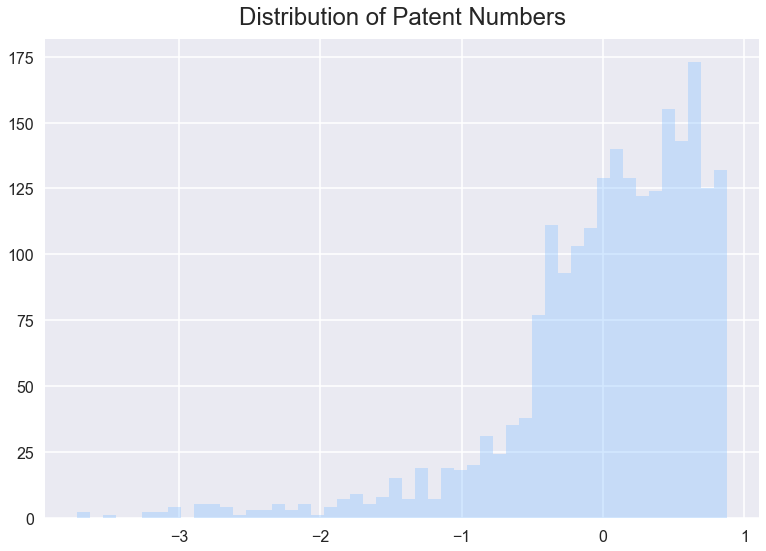

In [227]:
fig = plt.figure(facecolor='white')
sns.distplot([i for i in patent_numbers_z if i > -15], kde=False, bins=50)
plt.title('Distribution of Patent Numbers', fontsize=24, pad=15)
sns.despine()
plt.show()

### Applicants

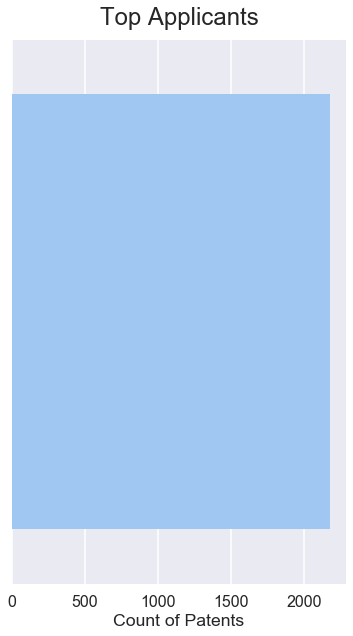

In [286]:
applicants = [i['applicant'] for i in patent_data.values()]
#PEs = [i.split('; ')[1] + ' ' + i.split('; ')[0] for i in PEs]
applicant_count = dict(collections.Counter(applicants))
n = 25
top_applicant_list = sorted(applicant_count, key=applicant_count.get, reverse=True)[:n]
top_applicantcount_list = [applicant_count[i] for i in top_applicant_list]

fig = plt.figure(figsize=(6,10), facecolor='white')
sns.barplot(top_applicantcount_list, top_applicant_list)
sns.despine()
plt.title('Top Applicants', fontsize=24, pad=15)
plt.xlabel('Count of Patents')
plt.show()

### Primary Examiners

First I'll plot the most common primary examiners. 

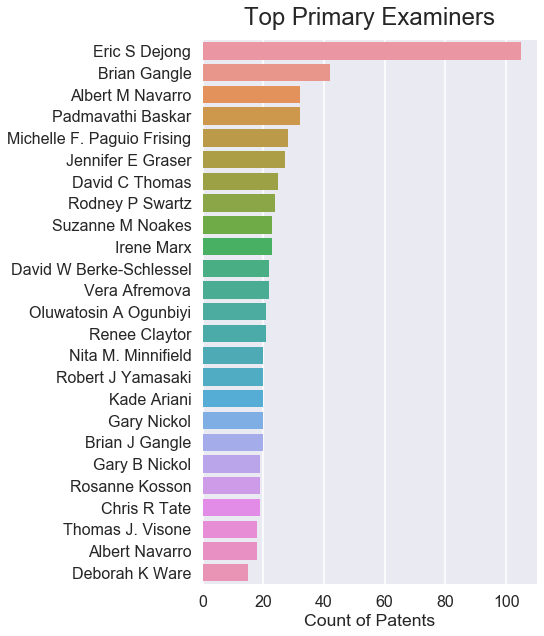

In [285]:
PEs = [i['primary_examiner'] for i in patent_data.values()]
PEs = [i.split('; ')[1] + ' ' + i.split('; ')[0] for i in PEs]
PEs_count = dict(collections.Counter(PEs))
n = 25
top_PE_list = sorted(PEs_count, key=PEs_count.get, reverse=True)[:n]
top_PEcount_list = [PEs_count[i] for i in top_PE_list]

fig = plt.figure(figsize=(6,10), facecolor='white')
sns.barplot(top_PEcount_list, top_PE_list)
sns.despine()
plt.title('Top Primary Examiners', fontsize=24, pad=15)
plt.xlabel('Count of Patents')
plt.show()

### Attorneys

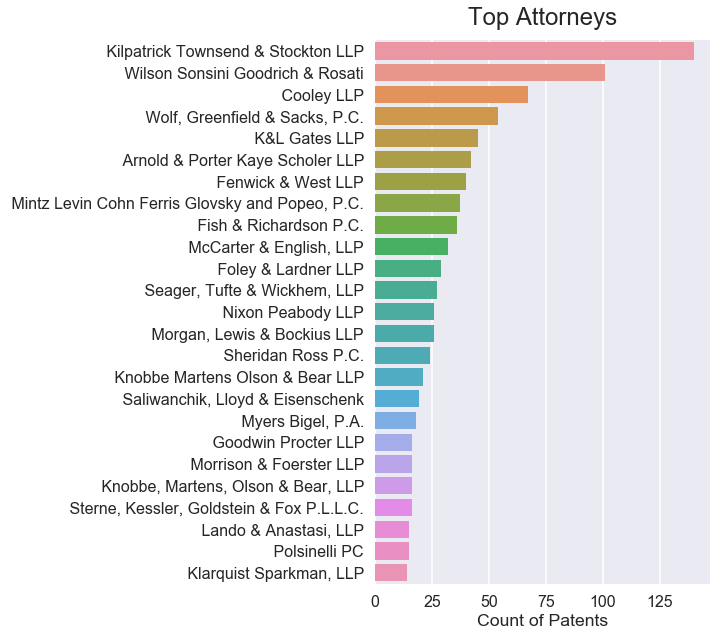

In [229]:
attorneys = [i['attorney'] for i in patent_data.values() if i['attorney'] != '']
attorneys = [i.replace('amp;', '') for i in attorneys]
attorneys_count = dict(collections.Counter(attorneys))
n = 25
top_attorney_list = sorted(attorneys_count, key=attorneys_count.get, reverse=True)[:n]
top_att_count_list = [attorneys_count[i] for i in top_attorney_list]

fig = plt.figure(figsize=(6,10), facecolor = 'white')
sns.barplot(top_att_count_list, top_attorney_list)
plt.title('Top Attorneys', fontsize=24, pad=15)
plt.xlabel('Count of Patents')
plt.show()

### Publication Dates

In [230]:
pub_dates = [i['publication_date'] for i in patent_data.values() if i['publication_date'] != '']
pub_dates = [i.replace('rch', 'Mar').replace('ary', 'Feb').replace('ust', 'Aug') for i in pub_dates]
pub_dates = [i.replace('ril', 'Apr').replace('une', 'Jun').replace('uly', 'Jul') for i in pub_dates]


### One could argue this substitution but the effect is minor
pub_dates = [i.replace('ber', 'Oct') for i in pub_dates]
#pub_dates = [i.replace('ber', 'Nov') for i in pub_dates]
pub_dates = [dt.datetime.strptime(i, '%b %d, %Y') for i in pub_dates]

In [231]:
pub_quarters = [str(i.year) + '-' + f'{pd.Timestamp(i).quarter}' for i in pub_dates]
pub_quarter_count = dict(collections.Counter(pub_quarters))
n = 25
top_pubquarter_list = sorted(pub_quarter_count, key=pub_quarter_count.get, reverse=True)[:n]
top_pubquarter_count_list = [pub_quarter_count[i] for i in top_pubquarter_list]


pub_years = [str(i.year) for i in pub_dates]
pub_year_count = dict(collections.Counter(pub_years))
n = 25
top_pubyear_list = sorted(pub_year_count, key=pub_year_count.get, reverse=True)[:n]
top_pubyear_count_list = [pub_year_count[i] for i in top_pubyear_list]


all_pub_quarters_list = sorted(pub_quarter_count, reverse=False)
all_pubquarter_count_list = [pub_quarter_count[i] for i in all_pub_quarters_list]

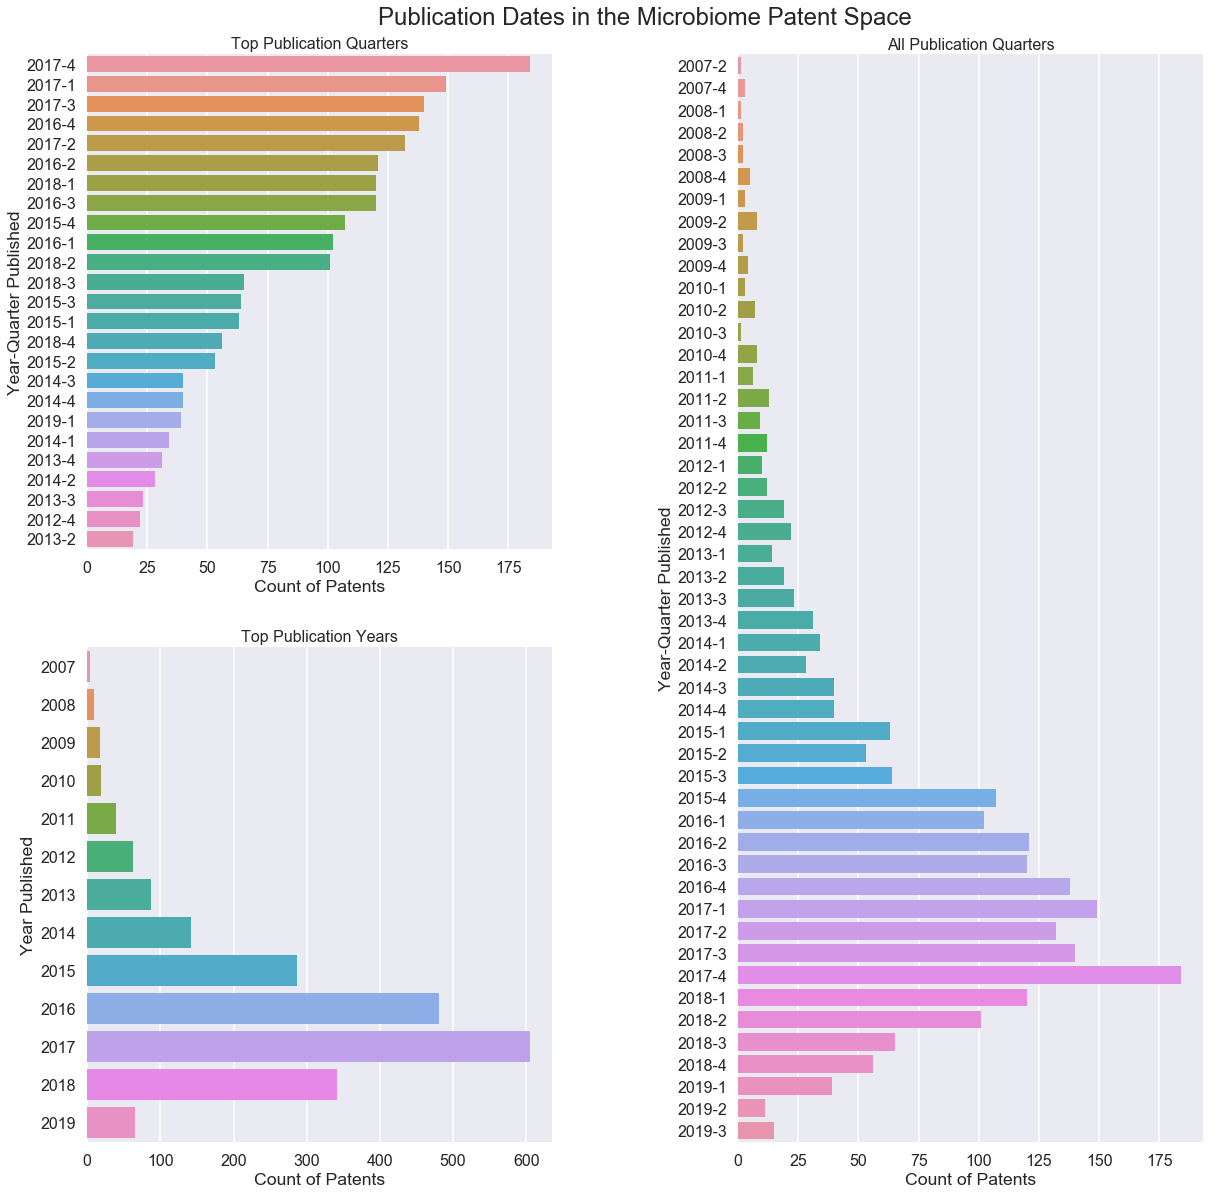

In [232]:
fig = plt.figure(figsize=(20,20), facecolor='white')
ax = fig.add_subplot(111, fc='white')    # The big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.4)
plt.title('Publication Dates in the Microbiome Patent Space', pad=30, fontsize=24)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[:,1])
sns.despine()

sns.barplot(top_pubquarter_count_list, top_pubquarter_list, ax=ax1)
sns.barplot(top_pubyear_count_list, top_pubyear_list, ax=ax2, orient='horizontal')
sns.barplot(all_pubquarter_count_list, all_pub_quarters_list, ax=ax3, orient='horizontal')

ax1.set_title('Top Publication Quarters', fontsize=16)
ax2.set_title('Top Publication Years', fontsize=16)
ax3.set_title('All Publication Quarters', fontsize=16)

ax1.set_xlabel('Count of Patents')
ax2.set_xlabel('Count of Patents')
ax3.set_xlabel('Count of Patents')

ax1.set_ylabel('Year-Quarter Published')
ax2.set_ylabel('Year Published')
ax3.set_ylabel('Year-Quarter Published')

plt.show()

### Abstracts

In [233]:
abstracts = [i['abstract'].lower() for i in patent_data.values()]
abstracts = [re.sub('[,;#()-:]|(\.)|(\.$)', '', i) for i in abstracts]
abstracts[0]

'a sporeforming bacillus species and more particularly a bacillus subtilis strain identified as mb is provided compositions comprising the mb strain methods of making products comprising the same and methods of using the same are also provided'

In [268]:
stop_words = set(stopwords.words('english')) 
fil_abstracts = []
corpus = []
ngrams_2 = []
ngrams_3 = []
st = PorterStemmer()

for abstract in tqdm(abstracts, total=len(abstracts)):
    word_tokens = word_tokenize(abstract)

    filtered_abstract = [st.stem(w) for w in word_tokens if not w in stop_words]
    corpus += filtered_abstract
    ngram_2 = TextBlob(' '.join(filtered_abstract)).ngrams(2)
    ngram_3 = TextBlob(' '.join(filtered_abstract)).ngrams(3)
    
    ngrams_2.append(['_'.join(list(i)) for i in ngram_2])
    ngrams_3.append(['_'.join(list(i)) for i in ngram_3])
    
    fil_abstracts.append(filtered_abstract)
    
corpus = list(set(corpus))
corpus_2grams = list(set([item for sublist in ngrams_2 for item in sublist]))
corpus_3grams = list(set([item for sublist in ngrams_3 for item in sublist]))

In [273]:
### Term Frequency across all abstracts
tf_dicts = {}
df_dicts = {}
idf_dicts = {}
tfidf_dicts = {}
for ngram, list_of_grams in [('1', fil_abstracts), ('2', ngrams_2), ('3', ngrams_3)]:
    tf_dict = {}
    for abstract_words in list_of_grams:
        for word in abstract_words:
            if word not in tf_dict.keys():
                tf_dict[word] = 1
            else:
                tf_dict[word] += 1
    tf_dicts[ngram] = tf_dict

    ### Document Frequency counting number of abstracts a word appears in
    df_dict = {}
    for abstract_words in list_of_grams:
        for word in set(abstract_words):
            if word not in df_dict.keys():
                df_dict[word] = 1
            else:
                df_dict[word] += 1
    df_dicts[ngram] = df_dict
    
    idf_dict = {}
    tfidf_dict = {}
    for word in df_dict.keys():
        idf_dict[word] = np.log(len(list_of_grams) / df_dict[word])
        tfidf_dict[word] = tf_dict[word] * idf_dict[word]
    idf_dicts[ngram] = idf_dict
    tfidf_dicts[ngram] = tfidf_dict
    

### 1-Grams

#### Top 1-Grams Lists

I'll sort the 1-gram dictionary by the value and take the top `n` keys then grab the corresponding word's counts. I also do the same for the document frequency dictionary (`df_dict`).

In [274]:
n = 25
top_term_list = sorted(tf_dicts['1'], key=tf_dicts['1'].get, reverse=True)[:n]
top_term_count_list = [tf_dicts['1'][i] for i in top_term_list]

n = 25
top_df_list = sorted(df_dicts['1'], key=df_dicts['1'].get, reverse=True)[:n]
top_df_count_list = [df_dicts['1'][i] for i in top_term_list]

#### 1-Gram Year-Quarter Corpuses

Now I'll go abstract by abstract and essentially build a corpus for each year-quarter. 

In [277]:
ab_text_year_quarter = {}
ab_count_year_quarter = {}
for abstract, year_quarter in zip(fil_abstracts, pub_quarters):
    if year_quarter not in ab_text_year_quarter.keys():
        ab_text_year_quarter[year_quarter] = abstract
        ab_count_year_quarter[year_quarter] = 1
    else:
        ab_text_year_quarter[year_quarter] += abstract
        ab_count_year_quarter[year_quarter] += 1

#### Common 1-Grams  Over Time

Now I'll loop through the top `n` common terms I want to track over time and count the number of times they appear in each of the year-quarter corpuses. 

In [282]:
common_terms_by_time = {}   
for common_term in top_term_list[:10]:
    word_count = 0
    common_terms_by_time[common_term] = {}
    for year_quarter in sorted(ab_text_year_quarter.keys()):
        
        for word in ab_text_year_quarter[year_quarter]:
            if common_term == word:
                word_count += 1
                continue
        common_terms_by_time[common_term][year_quarter] = word_count

#### Plot

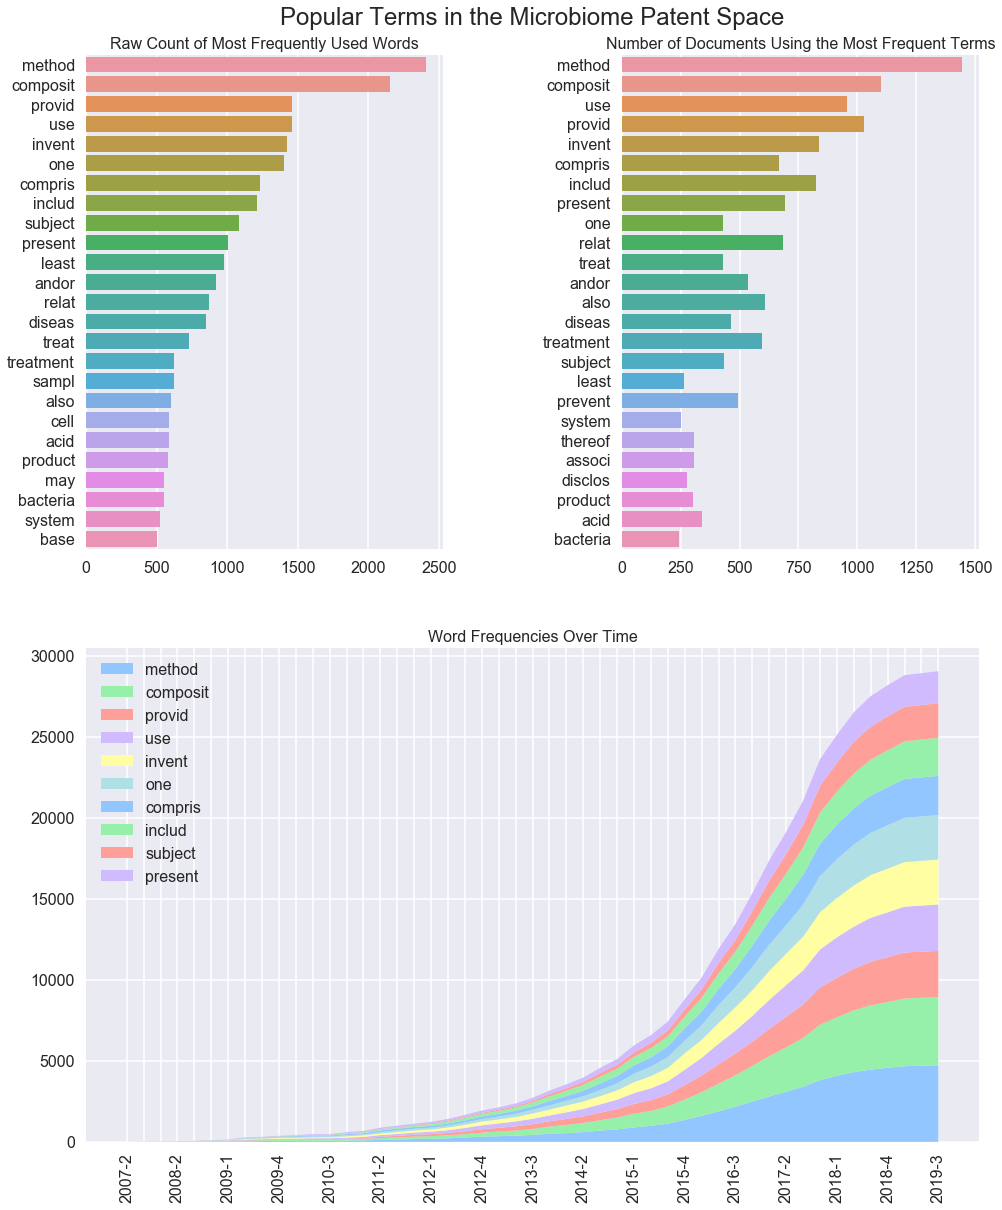

In [283]:
fig = plt.figure(figsize=(16,20), facecolor='white')
ax = fig.add_subplot(111, fc='white')    # The big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)
plt.title('Popular Terms in the Microbiome Patent Space', pad=30, fontsize=24)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,:])
sns.despine()

sns.barplot(top_term_count_list, top_term_list, ax=ax1)
sns.barplot(top_df_count_list, top_df_list, ax=ax2, orient='horizontal')
x_values = []
labels = []
for term, term_dict in common_terms_by_time.items():
    x_values.append(list(term_dict.values()))
    labels.append(term)
    y_values = common_terms_by_time[term].keys()

ax3.stackplot(y_values, x_values, labels=labels)
ax3.set_xticklabels(labels = list(term_dict.keys()), rotation=90)
for index, label in enumerate(ax3.xaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)
ax1.set_title('Raw Count of Most Frequently Used Words', fontsize=16)
ax2.set_title('Number of Documents Using the Most Frequent Terms', fontsize=16)
ax3.set_title('Word Frequencies Over Time', fontsize=16)
ax3.legend(loc='upper left')


plt.show()

### 2-Grams

#### Top 2-gram Lists

In [249]:
n = 25
top_2gram_list = sorted(tf_dicts['2'], key=tf_dicts['2'].get, reverse=True)[:n]
top_2gram_count_list = [tf_dicts['2'][i] for i in top_2gram_list]

n = 25
top_2gramdf_list = sorted(df_dicts['2'], key=df_dicts['2'].get, reverse=True)[:n]
top_2gramdf_count_list = [tf_dicts['2'][i] for i in top_2gramdf_list]

#### 2-Gram Year-Quarter Corpuses

In [279]:
ngram_2_text_year_quarter = {}
ngram_2_count_year_quarter = {}
for abstract, year_quarter in zip(ngrams_2, pub_quarters):
    if year_quarter not in ngram_2_text_year_quarter.keys():
        ngram_2_text_year_quarter[year_quarter] = abstract
        ngram_2_count_year_quarter[year_quarter] = 1
    else:
        ngram_2_text_year_quarter[year_quarter] += abstract
        ngram_2_count_year_quarter[year_quarter] += 1

#### Common 2-Grams Over Time

In [280]:
common_2grams_by_time = {}   
for common_term in top_2gram_list[:15]:
    word_count = 0
    common_2grams_by_time[common_term] = {}
    for year_quarter in sorted(ngram_2_text_year_quarter.keys()):
        
        for word in ngram_2_text_year_quarter[year_quarter]:
            if common_term == word:
                word_count += 1
                continue
        common_2grams_by_time[common_term][year_quarter] = word_count

#### Plot

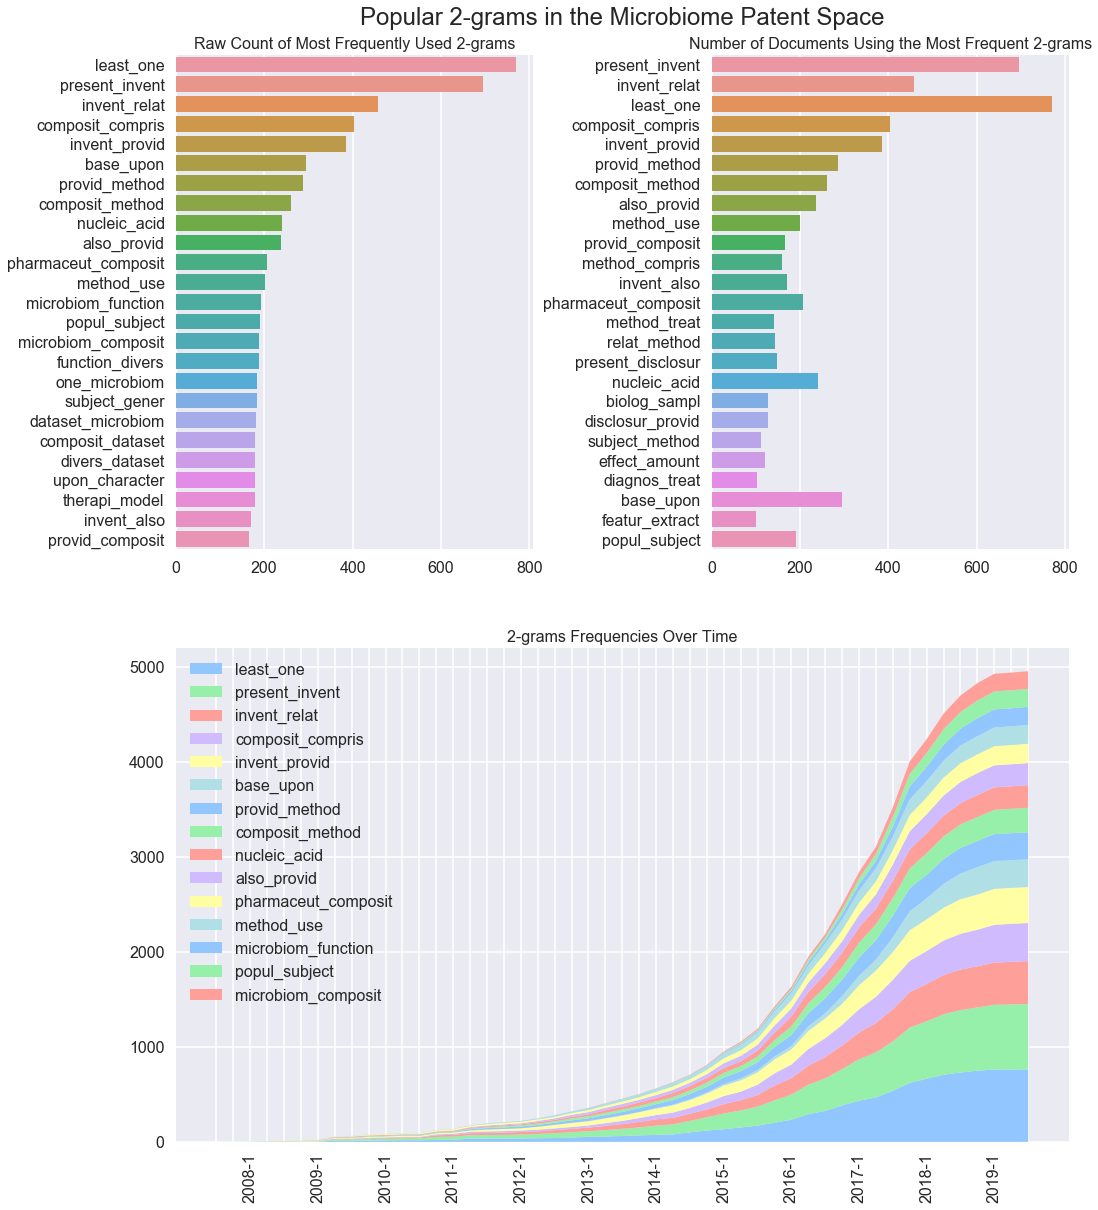

In [281]:
fig = plt.figure(figsize=(16,20), facecolor='white')
ax = fig.add_subplot(111, fc='white')    # The big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)
plt.title('Popular 2-grams in the Microbiome Patent Space', pad=30, fontsize=24)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,:])
sns.despine()

sns.barplot(top_2gram_count_list, top_2gram_list, ax=ax1)
sns.barplot(top_2gramdf_count_list, top_2gramdf_list, ax=ax2, orient='horizontal')
x_values = []
labels = []
for term, term_dict in common_2grams_by_time.items():
    x_values.append(list(term_dict.values()))
    labels.append(term)
    y_values = common_2grams_by_time[term].keys()

ax3.stackplot(y_values, x_values, labels=labels)
ax3.set_xticklabels(labels = list(term_dict.keys()), rotation=90)
for index, label in enumerate(ax3.xaxis.get_ticklabels()):
    if index % 4 != 2:
        label.set_visible(False)
ax1.set_title('Raw Count of Most Frequently Used 2-grams', fontsize=16)
ax2.set_title('Number of Documents Using the Most Frequent 2-grams', fontsize=16)
ax3.set_title('2-grams Frequencies Over Time', fontsize=16)
ax3.legend(loc='upper left')


plt.show()

### 3-grams

#### Top 3-Gram Lists

In [256]:
n = 25
top_3gram_list = sorted(tf_dicts['3'], key=tf_dicts['3'].get, reverse=True)[:n]
top_3gram_count_list = [tf_dicts['3'][i] for i in top_3gram_list]

n = 25
top_3gramdf_list = sorted(df_dicts['3'], key=df_dicts['3'].get, reverse=True)[:n]
top_3gramdf_count_list = [tf_dicts['3'][i] for i in top_3gramdf_list]

#### 3-Gram Year-Quarter Corpuses

In [284]:
ngram_3_text_year_quarter = {}
ngram_3_count_year_quarter = {}
for abstract, year_quarter in zip(ngrams_3, pub_quarters):
    if year_quarter not in ngram_3_text_year_quarter.keys():
        ngram_3_text_year_quarter[year_quarter] = abstract
        ngram_3_count_year_quarter[year_quarter] = 1
    else:
        ngram_3_text_year_quarter[year_quarter] += abstract
        ngram_3_count_year_quarter[year_quarter] += 1

#### Common 3-Grams Over Time

In [ ]:
common_3grams_by_time = {}   
for common_term in top_3gram_list[:15]:
    word_count = 0
    common_3grams_by_time[common_term] = {}
    for year_quarter in sorted(ngram_3_text_year_quarter.keys()):
        
        for word in ngram_3_text_year_quarter[year_quarter]:
            if common_term == word:
                word_count += 1
                continue
        common_3grams_by_time[common_term][year_quarter] = word_count

#### Plotting

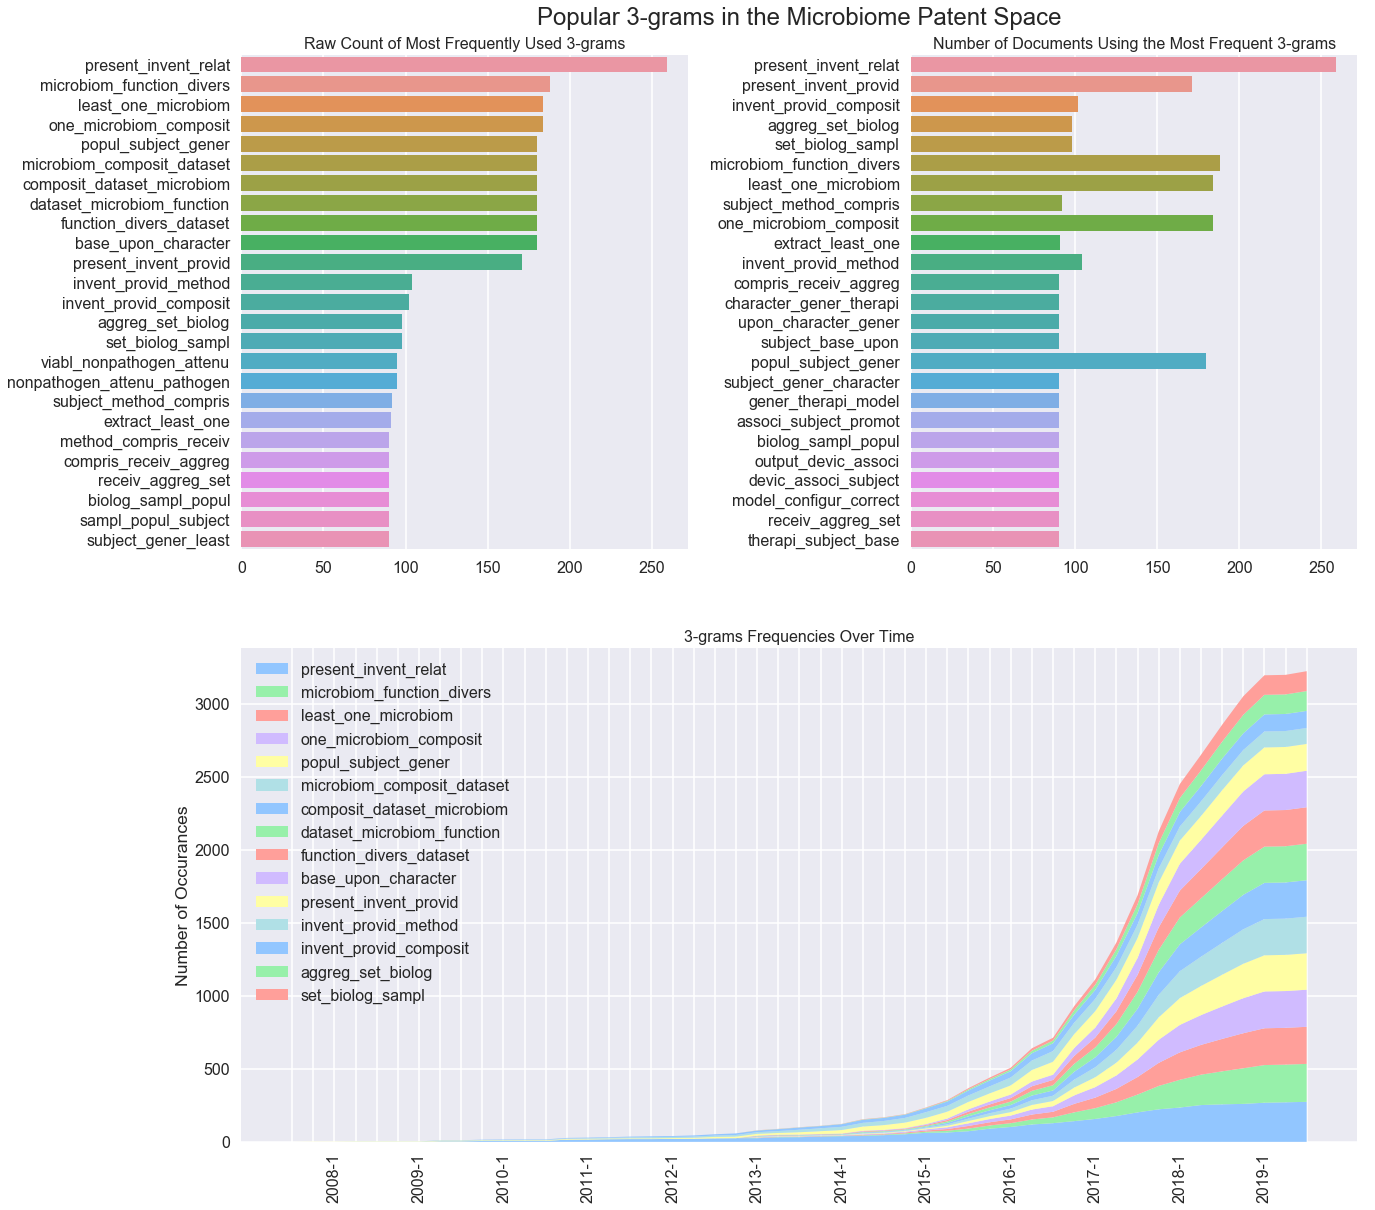

In [260]:
fig = plt.figure(figsize=(20,20), facecolor='white')
ax = fig.add_subplot(111, fc='white')    # The big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.5)
plt.title('Popular 3-grams in the Microbiome Patent Space', pad=30, fontsize=24)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,:])
sns.despine()

sns.barplot(top_3gram_count_list, top_3gram_list, ax=ax1)
sns.barplot(top_3gramdf_count_list, top_3gramdf_list, ax=ax2, orient='horizontal')
x_values = []
labels = []
for term, term_dict in common_3grams_by_time.items():
    x_values.append(list(term_dict.values()))
    labels.append(term)
    y_values = common_3grams_by_time[term].keys()

ax3.stackplot(y_values, x_values, labels=labels)
ax3.set_xticklabels(labels = list(term_dict.keys()), rotation=90)
ax3.set_ylabel('Number of Occurances')
for index, label in enumerate(ax3.xaxis.get_ticklabels()):
    if index % 4 != 2:
        label.set_visible(False)
ax1.set_title('Raw Count of Most Frequently Used 3-grams', fontsize=16)
ax2.set_title('Number of Documents Using the Most Frequent 3-grams', fontsize=16)
ax3.set_title('3-grams Frequencies Over Time', fontsize=16)
ax3.legend(loc='upper left')


plt.show()